https://www.bilibili.com/video/BV1ba411m72B/?spm_id_from=333.337.search-card.all.click&vd_source=7feec2d46b5cf86112b5e0efa2f0abfb

神经网络的每层的数据的传送是要有意义的

意义体现在我原本表达的意思，不能经过传递之后就曲解了，比如某句话传着传着变谣言

例如小学一个班男孩的身高是一个分布，有一个方差

过了若干年后聚会

这批男孩的身高是一个新分布，有一个新方差

方差描述的是这批数据分布的紧密程度

如果是同一批男孩，那么他们身高的分布大致不会变

所以我们用方差来衡量神经网络的输入到底和输出是不是同一分布

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def init_weights(u, a0, a1=None, a2=None, a3=None, a4=None):
    a_1 = a1 or a0
    a_2 = a2 or a0
    a_3 = a3 or a0
    a_4 = a4 or a0
    W0 = np.random.normal(u, a0, 400).reshape(2, 200)
    W1 = np.random.normal(u, a_1, 60000).reshape(200, 300)
    W2 = np.random.normal(u, a_2, 120000).reshape(300, 400)
    W3 = np.random.normal(u, a_3, 120000).reshape(400, 300)
    W4 = np.random.normal(u, a_4, 600).reshape(300, 2)
    return W0, W1, W2, W3, W4
def sigmoid(x):
    return 1 / (1 + np.exp(-x))                 # 定义sigmoid函数
def derivative_sigmoid(x):
    return x * (1 - x)   
def relu(x):
    return np.maximum(x, 0)
def leaky_relu(x, p=0.1):
    return np.maximum(x, p*x)
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def derivative_tanh(x):
    return 1-tanh(x)**2
def model(X, W0, W1, W2, W3, W4, act='tanh'):                       # 定义模型的前向传播过程
    if act == 'tanh':
        output_0 = tanh(X @ W0)                  # [n,  2] @ [ 2, 200] = [n, 200]
#         print(X.shape, W0.shape, output_0.shape)
        output_1 = tanh(output_0 @ W1)           # [n, 200] @ [200, 300] = [n, 300]
#         print(output_0.shape, W1.shape, output_1.shape)
        output_2 = tanh(output_1 @ W2)           # [n, 300] @ [300,  400] = [n,  400]
#         print(output_1.shape, W2.shape, output_2.shape)
        output_3 = tanh(output_2 @ W3)           # [n, 400] @ [400,  300] = [n,  300]
#         print(output_2.shape, W3.shape, output_3.shape)
        output_4 = tanh(output_3 @ W4)           # [n, 300] @ [300,  2] = [n,  2]
#         print(output_3.shape, W4.shape, output_4.shape)
    elif act == 'relu':
        output_0 = relu(X @ W0)                 
        output_1 = relu(output_0 @ W1)          
        output_2 = relu(output_1 @ W2)           
        output_3 = relu(output_2 @ W3)         
        output_4 = relu(output_3 @ W4)          
    elif act == 'leaky_relu':
        output_0 = leaky_relu(X @ W0)                 
        output_1 = leaky_relu(output_0 @ W1)           
        output_2 = leaky_relu(output_1 @ W2)        
        output_3 = leaky_relu(output_2 @ W3)          
        output_4 = leaky_relu(output_3 @ W4)         
    else:
        output_0 = sigmoid(X @ W0)              
        output_1 = sigmoid(output_0 @ W1)          
        output_2 = sigmoid(output_1 @ W2)          
        output_3 = sigmoid(output_2 @ W3)         
        output_4 = sigmoid(output_3 @ W4)         
    return [output_0, output_1, output_2, output_3, output_4]
def plot_hist(outputs, xlim=(-1, 1), ylim=(0, 1)):
    n = len(outputs)
    fig, axes=plt.subplots(1, n, figsize=(3*n, 3), sharex=True, sharey=True)
    for i in range(n):
        axes[i].hist(outputs[i].flatten(),bins=50,histtype="stepfilled",density=True,alpha=0.6)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.show()

# 全零初始化

### 每层输出都一样，因此无论网络训练多少轮

### 对于每一层中的各个神经元，weights都是相同的，无法学习（提取）到不同的特征

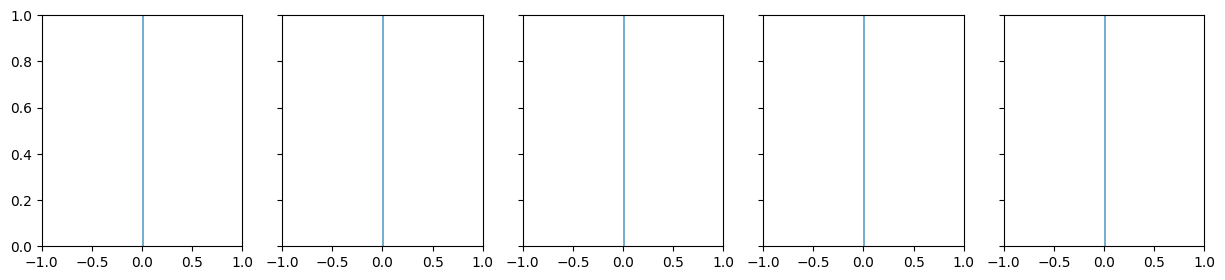

In [6]:
W0, W1, W2, W3, W4 = init_weights(0, 0)
X = np.random.normal(0, 1, 1000).reshape(-1, 2) # 初始化X，用于下面所有测试
outputs = model(X, W0, W1, W2, W3, W4, 'tanh')
plot_hist(outputs, xlim=(-1, 1), ylim=(0, 1))

# 小一点的随机权值初始化

## 保证了更新不是相同的

## 但几乎聚集0，信息仍然传不过去，局部梯度也为0，梯度太小

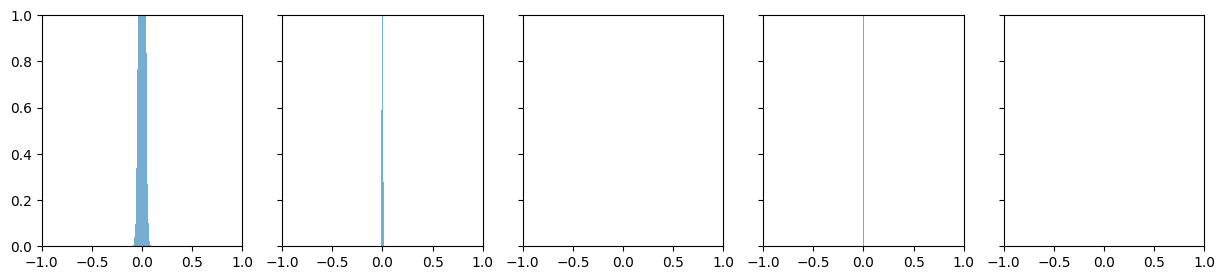

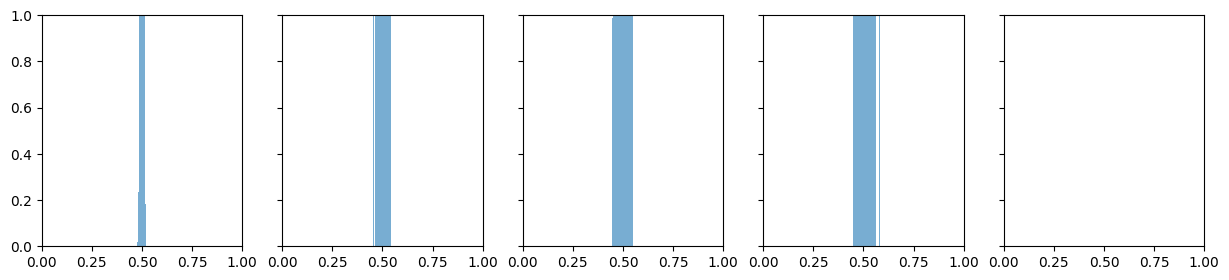

In [7]:
W0, W1, W2, W3, W4 = init_weights(0, 0.01)

outputs = model(X, W0, W1, W2, W3, W4, 'tanh')
plot_hist(outputs, xlim=(-1, 1), ylim=(0, 1))

outputs = model(X, W0, W1, W2, W3, W4, 'sigmoid')
plot_hist(outputs, xlim=(0, 1), ylim=(0, 1))

# 大一点的值初始化

## 信息传过去了部分，但由于tanh函数的作用，值太大就饱和了，梯度太小

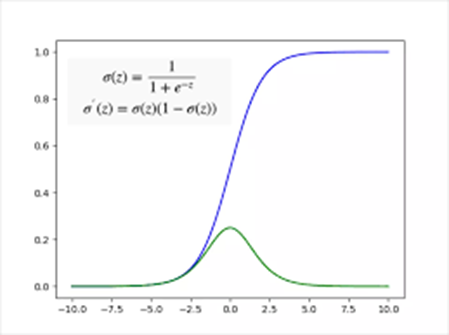!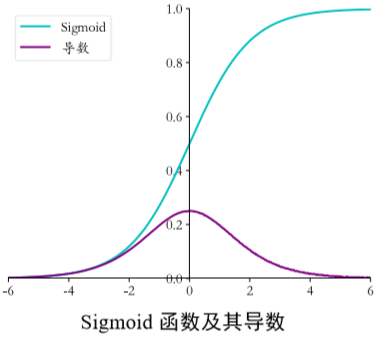!




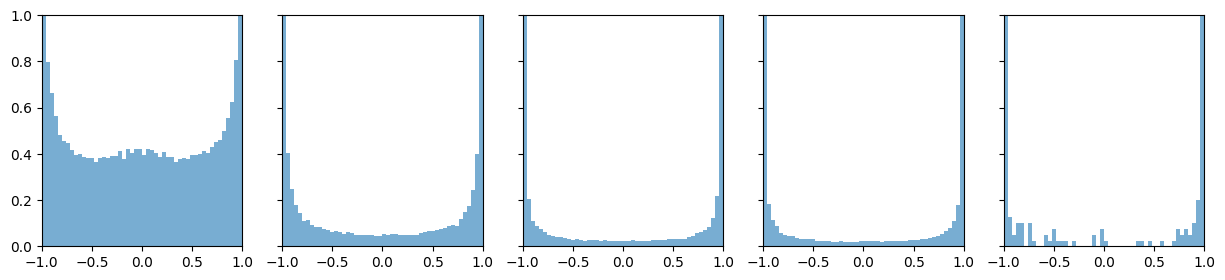

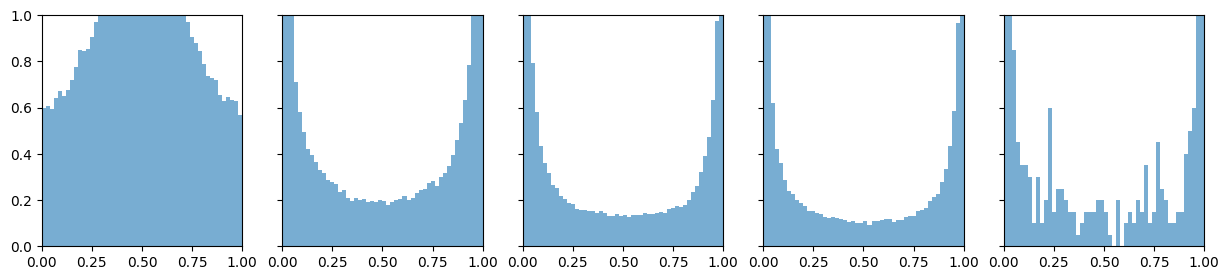

In [8]:
W0, W1, W2, W3, W4 = init_weights(0, 1)   # 0:均值。1:方差.

outputs = model(X, W0, W1, W2, W3, W4, 'tanh')
plot_hist(outputs, xlim=(-1, 1), ylim=(0, 1))

outputs = model(X, W0, W1, W2, W3, W4, 'sigmoid')
plot_hist(outputs, xlim=(0, 1), ylim=(0, 1))

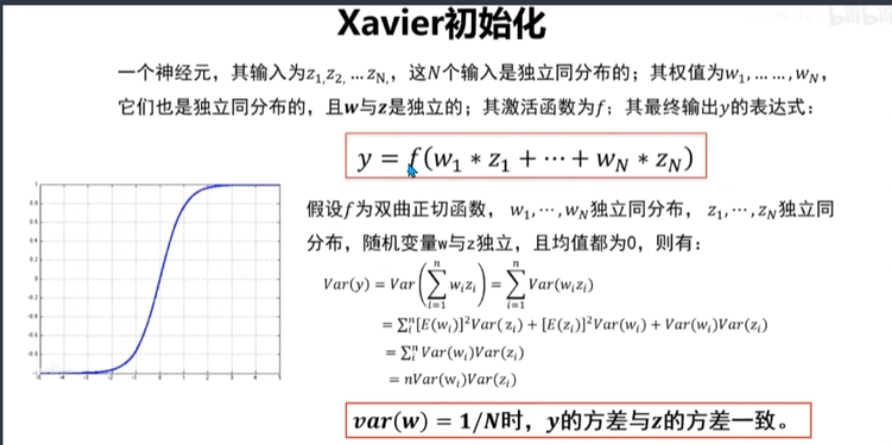


 D(XY)在X,Y独立的时候,存这个公式D(XY)=D(X)D(Y)+D(X)(EY)^2+D(Y)(EX)^2

 图中公式只是上面这个公式的求和形式

 Xavier找了一种理想情况，当各个向量内同分布，向量间独立的情况来探讨如何让输入输出同分布

 显然当权重的方差为输入维度的1/N时，保留的信息最好

 这里为什么要用tanh？因为Xavier讨论的是一种很理想的情况，当数据分布在[-1, 1]时，tanh导数≈1

首先验证权重初始化的方差是按照输入维度1/N

用tanh和sigmoid验证

如果效果比较理想，那么应当是输入是什么样的就能传过去什么样，从左往右正向传播

(2, 200)
(200, 300)
[0.00177204 0.08760593]


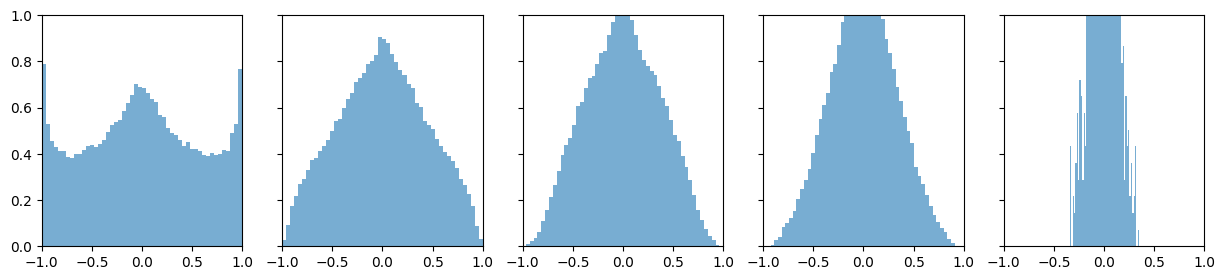

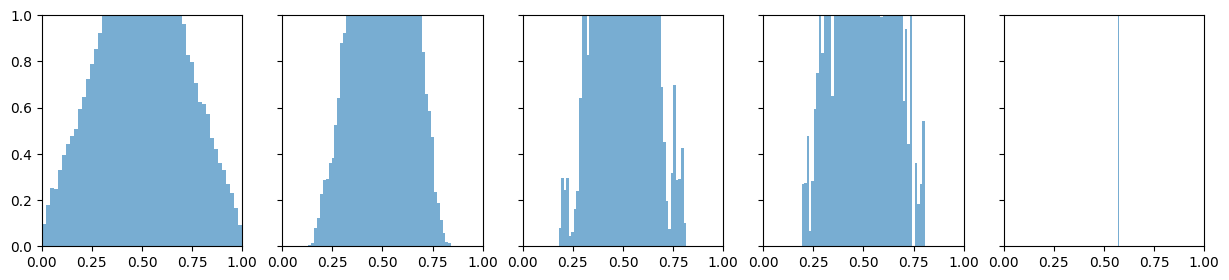

In [12]:
# 这里传入的参数是输入数据维度的标准差的倒数，因为numpy创建正态分布是靠标准差来创建的
W0, W1, W2, W3, W4 = init_weights(0, (1/2)**0.5, (1/200)**0.5, (1/300)**0.5, (1/400)**0.5, (1/300)**0.5)
print(W0.shape)
print(W1.shape)
print(W4[0])
outputs = model(X, W0, W1, W2, W3, W4, 'tanh')
plot_hist(outputs, xlim=(-1, 1), ylim=(0, 1))

outputs = model(X, W0, W1, W2, W3, W4, 'sigmoid')
plot_hist(outputs, xlim=(0, 1), ylim=(0, 1))
# 明显看到分布基本上是属于正太分布，数据正向传播通畅

# 光考虑正向传播是不够的，我们还要考虑反向传播更新梯度

# 如果效果比较理想，那么应当是输入是什么样的就能传过去什么样，从右往左反向传播

# 注意此时是从右往左看

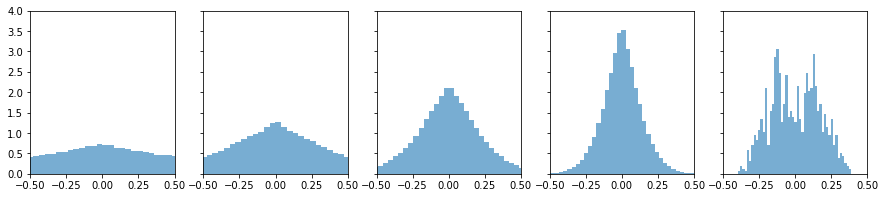

In [73]:
# 2，200，300，400，300指的都是输入维度
W0, W1, W2, W3, W4 = init_weights(0, (1/2)**0.5, (1/200)**0.5, (1/300)**0.5, (1/400)**0.5, (1/300)**0.5)  
lr = 0.01
epochs = 1
Y_onehot = []  # 随机生成一个y标签的独热编码，因为要用于计算损失反向传播更新梯度
for i in range(X.shape[0]):
    temp = np.random.randint(0, 2)
    Y_onehot.append([temp, abs(1-temp)])
Y_onehot = np.array(Y_onehot)  

for epoch in range(epochs):
    for j in range(X.shape[0]):
        [output_0, output_1, output_2, output_3, output_4] = model(X[j], W0, W1, W2, W3, W4, 'tanh')
        # 反向传播计算梯度， 梯度的维度和权重维度相同，因为等会要更新权重
        loss_4 = derivative_tanh(output_4) * (Y_onehot[j] - output_4)    
        grad_4 = output_3.reshape(-1,1) @ loss_4.reshape(1,-1)                  
        loss_3 = derivative_tanh(output_3) * (W4 @ loss_4)                       
        grad_3 = output_2.reshape(-1,1) @ loss_3.reshape(1,-1)  
        loss_2 = derivative_tanh(output_2) * (W3 @ loss_3)                       
        grad_2 = output_1.reshape(-1,1) @ loss_2.reshape(1,-1) 
        loss_1 = derivative_tanh(output_1) * (W2 @ loss_2)                       
        grad_1 = output_0.reshape(-1,1) @ loss_1.reshape(1,-1)                     
        loss_0 = derivative_tanh(output_0) * (W1 @ loss_1)                      
        grad_0 = X[j].reshape(-1,1) @ loss_0.reshape(1,-1)                   

        # 梯度更新
        W4 += lr*grad_4
        W3 += lr*grad_3 
        W2 += lr*grad_2
        W1 += lr*grad_1 
        W0 += lr*grad_0
    
outputs = model(X, W0, W1, W2, W3, W4, 'tanh')
plot_hist(outputs, xlim=(-0.5, 0.5), ylim=(0, 4))

# 显然从右往左看，反向传播的信息是不能够很好的传递的，所以Xavier重新考虑反向传播

<img src="./init weight pic4.png" align=left width=1200>


# 首先验证权重初始化的方差是按照输入维度和输出维度之和的倒数的2倍 2/(Nin+Nout)

# 用tanh和sigmoid验证

# 如果效果比较理想，那么应当是输入是什么样的就能传过去什么样

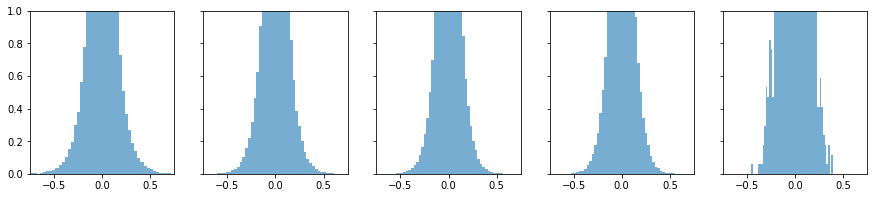

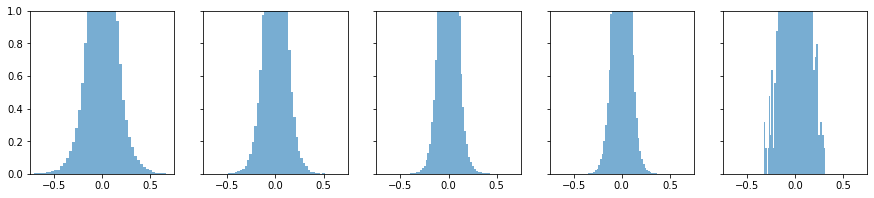

In [74]:
# 这里的分母是输入维度加上输出维度(2+200),(200+300),(300+400),(400+300),(300+2),因为要牵涉到反向传播，所以只用输入维度作为N是不适用于反向传播的
# 这里传入的参数是输入数据维度的标准差的倒数，因为numpy创建正态分布是靠标准差来创建的
W0, W1, W2, W3, W4 = init_weights(0, (2/(2+200))**0.5, (2/(200+300))**0.5, (2/(300+400))**0.5, (2/(400+300))**0.5, (2/(300+2))**0.5)
outputs = model(X, W0, W1, W2, W3, W4, 'tanh')
plot_hist(outputs, xlim=(-0.75, 0.75), ylim=(0, 1))
# 明显看到分布基本上是属于正太分布，数据正向传播通畅

lr = 0.01
epochs = 1
for epoch in range(epochs):
    for j in range(X.shape[0]):
        [output_0, output_1, output_2, output_3, output_4] = model(X[j], W0, W1, W2, W3, W4, 'tanh')
        # 反向传播计算梯度， 梯度的维度和权重维度相同，因为等会要更新权重
        loss_4 = derivative_tanh(output_4) * (Y_onehot[j] - output_4)    
        grad_4 = output_3.reshape(-1,1) @ loss_4.reshape(1,-1)              
        loss_3 = derivative_tanh(output_3) * (W4 @ loss_4)                       
        grad_3 = output_2.reshape(-1,1) @ loss_3.reshape(1,-1) 
        loss_2 = derivative_tanh(output_2) * (W3 @ loss_3)                       
        grad_2 = output_1.reshape(-1,1) @ loss_2.reshape(1,-1) 
        loss_1 = derivative_tanh(output_1) * (W2 @ loss_2)                       
        grad_1 = output_0.reshape(-1,1) @ loss_1.reshape(1,-1) 
        loss_0 = derivative_tanh(output_0) * (W1 @ loss_1)                      
        grad_0 = X[j].reshape(-1,1) @ loss_0.reshape(1,-1)                   

        # 梯度更新
        W4 += lr*grad_4
        W3 += lr*grad_3 
        W2 += lr*grad_2
        W1 += lr*grad_1 
        W0 += lr*grad_0
    
outputs = model(X, W0, W1, W2, W3, W4, 'tanh')
plot_hist(outputs, xlim=(-0.75, 0.75), ylim=(0, 1))

# 用tanh先进行一次正向传播为上图

# 学习率0.01，训练一个epoch的反向传播为下图

# 第一幅图正向传播，从左往右看，信息基本传递

# 第二幅图反向传播，从右往左看，信息基本传递

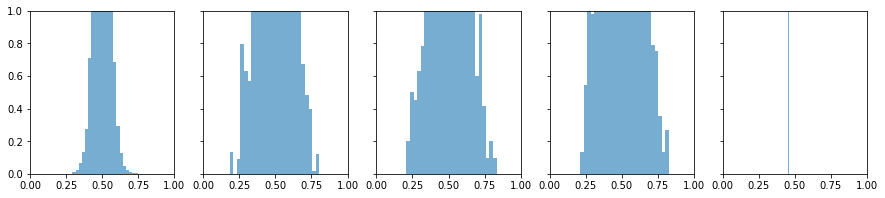

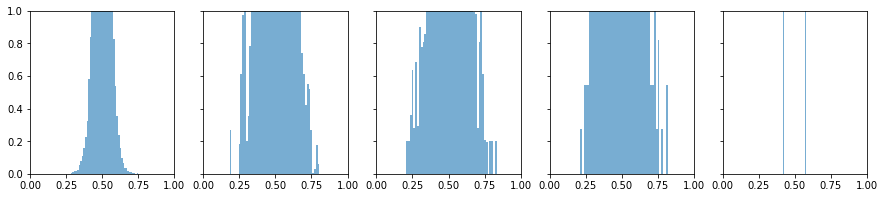

In [61]:
# 这里传入的参数是输入数据维度的标准差的倒数，因为numpy创建正态分布是靠标准差来创建的
W0, W1, W2, W3, W4 = init_weights(0, (2/(2+200))**0.5, (2/(200+300))**0.5, (2/(300+400))**0.5, (2/(400+300))**0.5, (2/(300+2))**0.5)

outputs = model(X, W0, W1, W2, W3, W4, 'sigmoid')
n = len(outputs)
fig, axes=plt.subplots(1, n, figsize=(3*n, 3), sharex=True, sharey=True)
for i in range(n):
    axes[i].hist(outputs[i].flatten(),bins=25,histtype="stepfilled",density=True,alpha=0.6)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()
# 明显看到分布基本上是属于正太分布，数据正向传播通畅

lr = 0.01
epochs = 1
# Y_onehot = []
# for i in range(X.shape[0]):
#     temp = np.random.randint(0, 1)
#     Y_onehot.append([temp, abs(1-temp)])
# Y_onehot = np.array(Y_onehot)  
for epoch in range(epochs):
    for j in range(X.shape[0]):
        [output_0, output_1, output_2, output_3, output_4] = model(X[j], W0, W1, W2, W3, W4, 'sigmoid')
        # 反向传播计算梯度， 梯度的维度和权重维度相同，因为等会要更新权重
        # 最后一层“损失” = 最后一层输出带入sigmoid偏导 * (真实值 - 最后一层输出)
        loss_4 = derivative_sigmoid(output_4) * (Y_onehot[j] - output_4)    
        # 该层梯度 = 上层权重 @ 该层“损失”
        grad_4 = output_3.reshape(-1,1) @ loss_4.reshape(1,-1)                      

        # 非最后一层的该层“损失” = 该层输出带入sigmoid偏导 * (下一层权重 - 下一层“损失”)
        loss_3 = derivative_sigmoid(output_3) * (W4 @ loss_4)                       
        grad_3 = output_2.reshape(-1,1) @ loss_3.reshape(1,-1)  

        # 非最后一层的该层“损失” = 该层输出带入sigmoid偏导 * (下一层权重 - 下一层“损失”)
        loss_2 = derivative_sigmoid(output_2) * (W3 @ loss_3)                       
        grad_2 = output_1.reshape(-1,1) @ loss_2.reshape(1,-1) 

        # 非最后一层的该层“损失” = 该层输出带入sigmoid偏导 * (下一层权重 - 下一层“损失”)
        loss_1 = derivative_sigmoid(output_1) * (W2 @ loss_2)                       
        grad_1 = output_0.reshape(-1,1) @ loss_1.reshape(1,-1)                     

        loss_0 = derivative_sigmoid(output_0) * (W1 @ loss_1)                      
        grad_0 = X[j].reshape(-1,1) @ loss_0.reshape(1,-1)                   

        # 梯度更新
        W4 += lr*grad_4
        W3 += lr*grad_3 
        W2 += lr*grad_2
        W1 += lr*grad_1 
        W0 += lr*grad_0
    
outputs = model(X, W0, W1, W2, W3, W4, 'sigmoid')
plot_hist(outputs, xlim=(0, 1), ylim=(0, 1))

# 用sigmoid先进行一次正向传播为上图

# 学习率0.01，训练一个epoch的反向传播为下图

# 第一幅图正向传播，从左往右看，信息基本传递

# 第二幅图反向传播，从右往左看，信息基本传递

# Relu函数不适用Xavier初始化权重方法

# 因为随机杀死一半，破坏了数据的分布

# Relu不会有小于0的数，所以只画了大于0的部分

# 基本上在第4层时候就没什么信息了

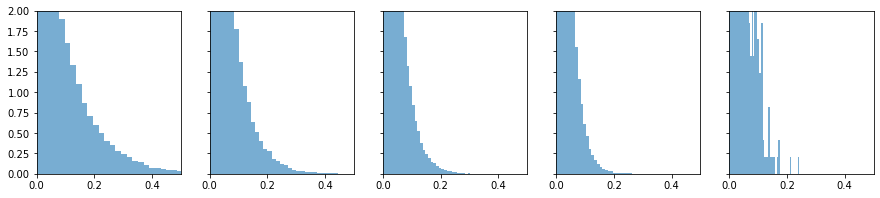

In [112]:
W0, W1, W2, W3, W4 = init_weights(0, (2/(2+200))**0.5, (2/(200+300))**0.5, (2/(300+400))**0.5, (2/(400+300))**0.5, (2/(300+2))**0.5)

outputs = model(X, W0, W1, W2, W3, W4, 'relu')
plot_hist(outputs, xlim=(0, 0.5), ylim=(0, 2))

# 如果使用Relu函数，则采用何凯明大神的初始化权重方法

# 仅仅只是将Xavier中方差改为2倍，就能很好的缓和使用Relu的情况

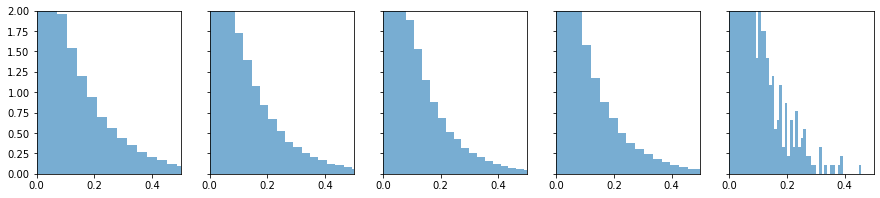

In [113]:
W0, W1, W2, W3, W4 = init_weights(0, (2*2/(2+200))**0.5, (2*2/(200+300))**0.5, (2*2/(300+400))**0.5, (2*2/(400+300))**0.5, (2*2/(300+2))**0.5)

outputs = model(X, W0, W1, W2, W3, W4, 'relu')
plot_hist(outputs, xlim=(0, 0.5), ylim=(0, 2))

# 但是这样并不是适用于relu的变体，于是何凯明大神做了一个推广

# 这里分母的理解是，如果把全体实数R看作2份，那么relu相当于杀死了其中1份，所以a=0

# 那么leaky relu(a)相当于抑制了一半，抑制的系数a

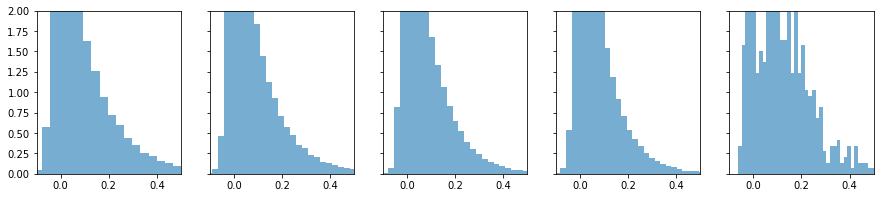

In [83]:
a = 0.3
W0, W1, W2, W3, W4 = init_weights(0, (2*2/((1+a**2)*(2+200)))**0.5, (2*2/((1+a**2)*(200+300)))**0.5, 
                                  (2*2/((1+a**2)*(300+400)))**0.5, (2*2/((1+a**2)*(400+300)))**0.5, (2*2/((1+a**2)*(300+2)))**0.5)

outputs = model(X, W0, W1, W2, W3, W4, 'leaky_relu')
plot_hist(outputs, xlim=(-0.1, 0.5), ylim=(0, 2))

# sigmoid和tanh函数用Xavier比较合适，relu和leaky relu用何凯明方法比较合适

In [65]:
import torch
def cal(x):
    return (x.mean(), x.var())
uniform_w = torch.nn.init.uniform_(torch.empty(300, 500), a=0.0, b=1.0)
normal_w = torch.nn.init.normal_(torch.empty(300, 500), mean=0.0, std=1.0)
xavier_uniform_w = torch.nn.init.xavier_uniform_(torch.empty(300, 500), gain=1.0)
kaiming_uniform_w = torch.nn.init.kaiming_uniform_(torch.empty(300, 500), a=0,mode='fan_in',nonlinearity='relu')
xavier_normal_w = torch.nn.init.xavier_normal_(torch.empty(300, 500), gain=1.0)
kaiming_normal_w = torch.nn.init.kaiming_normal_(torch.empty(300, 500), a=0,mode='fan_in',nonlinearity='relu')
kaiming_uniform_w_l = torch.nn.init.kaiming_uniform_(torch.empty(300, 500), a=0.3,mode='fan_in',nonlinearity='leaky_relu')
kaiming_normal_w_l = torch.nn.init.kaiming_normal_(torch.empty(300, 500), a=0.3,mode='fan_in',nonlinearity='leaky_relu')

In [66]:
print('uniform_w:', cal(uniform_w))
print('normal_w:', cal(normal_w))
print('xavier均匀分布:', cal(xavier_uniform_w))
print('kaiming均匀分布by torch:', cal(kaiming_uniform_w))
print('xavier正态分布:', cal(xavier_normal_w))
print('kaiming正态分布by torch:', cal(kaiming_normal_w))
print('kaiming均匀分布leakyrelu:', cal(kaiming_uniform_w_l))
print('kaiming正态分布leakyrelu by torch:', cal(kaiming_normal_w_l))

uniform_w: (tensor(0.4999), tensor(0.0833))
normal_w: (tensor(-0.0016), tensor(0.9989))
xavier均匀分布: (tensor(0.0001), tensor(0.0025))
kaiming均匀分布by torch: (tensor(7.6385e-05), tensor(0.0040))
xavier正态分布: (tensor(6.1033e-05), tensor(0.0025))
kaiming正态分布by torch: (tensor(7.5544e-05), tensor(0.0040))
kaiming均匀分布leakyrelu: (tensor(-1.6571e-05), tensor(0.0037))
kaiming正态分布leakyrelu by torch: (tensor(-0.0001), tensor(0.0037))


<img src="./init weight pic5.png" align=left width=600>


In [67]:
# 均匀分布的方差是区间长度的平方再除以12
# 何凯明就是在xavier基础上乘了2，但最后有个近似处理，假设输入输出维度一样，便可以约掉2，但可以设置你想要保证正向还是反向。
print('[0, 1]均匀分布的均值与方差', 1/2, (1-0)**2/12)
print('xavier均匀分布的方差', (2*((6/(800))**0.5))**2/12)
print('kaiming均匀分布的方差', (2*((2*6/(800))**0.5))**2/12)  # 2*6/(400+400) -> 6/400
print('kaiming均匀分布的方差近似', (2*((6/(500))**0.5))**2/12)
print('xavier正态分布的方差', 2/(800))
print('kaiming正态分布的方差', 2*2/(800))     # 2*2/(400+400) -> 2/400
print('kaiming正态分布的方差近似', 2/(500))
print('kaiming均匀分布的方差leakyrelu', (2*((2*6/((1+0.3**2)*800))**0.5))**2/12)
print('kaiming均匀分布的方差近似leakyrelu', (2*((6/((1+0.3**2)*500))**0.5))**2/12)
print('kaiming正态分布的方差leakyrelu', 2*2/((1+0.3**2)*800))
print('kaiming正态分布的方差近似leakyrelu', 2/((1+0.3**2)*500))

[0, 1]均匀分布的均值与方差 0.5 0.08333333333333333
xavier均匀分布的方差 0.0025
kaiming均匀分布的方差 0.005
kaiming均匀分布的方差近似 0.004
xavier正态分布的方差 0.0025
kaiming正态分布的方差 0.005
kaiming正态分布的方差近似 0.004
kaiming均匀分布的方差leakyrelu 0.0045871559633027525
kaiming均匀分布的方差近似leakyrelu 0.0036697247706422016
kaiming正态分布的方差leakyrelu 0.004587155963302752
kaiming正态分布的方差近似leakyrelu 0.003669724770642202


In [ ]:
uniform_w: (tensor(0.4999), tensor(0.0833))
normal_w: (tensor(-0.0016), tensor(0.9989))
xavier均匀分布: (tensor(0.0001), tensor(0.0025))
kaiming均匀分布by torch: (tensor(7.6385e-05), tensor(0.0040))
xavier正态分布: (tensor(6.1033e-05), tensor(0.0025))
kaiming正态分布by torch: (tensor(7.5544e-05), tensor(0.0040))
kaiming均匀分布leakyrelu: (tensor(-1.6571e-05), tensor(0.0037))
kaiming正态分布leakyrelu by torch: (tensor(-0.0001), tensor(0.0037))